<a href="https://colab.research.google.com/github/PAVANGUBBALA/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [2]:
df=pd.read_csv("/content/scaler_clustering.csv")

In [3]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [4]:
df.shape

(205843, 7)

In [5]:
df.job_position.value_counts()

job_position
Backend Engineer                 43554
FullStack Engineer               24717
Other                            18071
Frontend Engineer                10417
Engineering Leadership            6870
                                 ...  
PhD. Student                         1
Front-End Developer                  1
ayS                                  1
Principal Product Engineer           1
Android Application developer        1
Name: count, Length: 1016, dtype: int64

In [6]:
df.job_position.nunique( )

1016

In [7]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0','email_hash'],axis=1,inplace=True)

In [9]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,2017.0,1400000,FullStack Engineer,2019.0


In [10]:
df[df["job_position"].apply(lambda x : "&" in str(x))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
27272,ctaxw cxrrvst ouv qtogqn,2019.0,1800000,F&b service,2021.0
34995,vwwtznhqt,2017.0,440000,Software Prod & Plat Eng Analyst,2021.0
35033,wgszxkvzn,2017.0,600000,Developer & Production Support,2021.0
38010,wxowg,2015.0,1006400,SE(R&D),2015.0
46190,ojzguojo xzw,2012.0,2700000,R & D Engineer-2,2019.0
46194,vbvav ogen xzaxv,2015.0,1100000,Software Engineer R&D,2017.0
60643,xuogen,2012.0,1250000,R&D Engineer,2016.0
68504,wvatzwt atoxsz ojontbo,2021.0,250000,Software Engineer(R&D) Intern,2020.0
127287,zgpxv,2013.0,890000,R & D engineer,2019.0
132176,ovbohzs trtwnqgzxwo,2011.0,1500000,R&D Engineer,2016.0


In [11]:
#From This We can Conclude That There Were Special Charecter's present In Job Position

In [12]:
def remove_special_chars(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

In [13]:
df["job_position"]=df["job_position"].apply(lambda x : remove_special_chars(str(x)))

In [14]:
df[df["job_position"].apply(lambda x : "&" in str(x))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year


In [15]:
#Special Charecter's In Job_Position Column was Removed

In [16]:
df["job_position"].nunique()

856

In [17]:
#From 1017 Job_positions Reduced To 857 Unique Job_positions By Removing The Special Charecter's

In [18]:
df.shape

(205843, 5)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(188246, 5)

In [21]:
#There are 17596 Duplicate rows

In [22]:
df["company_hash"].nunique()

37299

In [23]:
df["company_hash"]=df["company_hash"].apply(lambda x : remove_special_chars(str(x)))

In [24]:
#Removing Special Charecter's From The Company Hash Column

In [25]:
df["company_hash"].nunique()

37208

In [26]:
#There are 91 Company Names With Special Charecter's

In [27]:
#Checking For The Blank Place In The company_hash or job_position columns

In [28]:
df[((df['company_hash']=='') | (df['job_position']==''))]

,company_hash,orgyear,ctc,job_position,ctc_updated_year
2208,,2017.0,100000,nan,2020.0
2940,,2020.0,100000,nan,2020.0
4151,,2020.0,350000,nan,2021.0
4162,,2013.0,900000,fullstack engineer,2021.0
4250,,2015.0,700000,nan,2020.0
...,...,...,...,...,...
199771,,2015.0,200000,fullstack engineer,2019.0
200316,,2019.0,900000,backend engineer,2020.0
200766,,2004.0,2050000,nan,2017.0
201131,,2016.0,500000,nan,2017.0


In [29]:
#There Were 94 Rows

In [ ]:
#Excluding Those Row's Having Blank Place In The company_hash or job_position columns

In [30]:
df=df[~((df['company_hash']=='') | (df['job_position']==''))]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188152 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      188152 non-null  object 
 1   orgyear           188066 non-null  float64
 2   ctc               188152 non-null  int64  
 3   job_position      188152 non-null  object 
 4   ctc_updated_year  188152 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ MB


In [32]:
#There Were 86 Null values In The orgyear Column

In [33]:
df["orgyear"].fillna(df.groupby("company_hash")["orgyear"].transform("median"),inplace=True)

In [34]:
#Imputed The orgyear with Company median orgyear

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188152 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      188152 non-null  object 
 1   orgyear           188126 non-null  float64
 2   ctc               188152 non-null  int64  
 3   job_position      188152 non-null  object 
 4   ctc_updated_year  188152 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ MB


In [36]:
#Checking For  Null Values In The Data

In [37]:
df.isna().sum()

company_hash         0
orgyear             26
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [38]:
#Dropping The Null Values In The Data

In [39]:
df.dropna(inplace=True)

In [40]:
#Checking For Null Values In The Data

In [44]:
df.isna().sum()

company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [45]:
#There Are No Null values In The Data

In [46]:
df.orgyear.value_counts()

orgyear
2018.0    22157
2016.0    21477
2017.0    21320
2015.0    19613
2019.0    18550
          ...  
2107.0        1
1972.0        1
2101.0        1
206.0         1
200.0         1
Name: count, Length: 79, dtype: int64

In [47]:
lower_year=df.orgyear.quantile(0.01)

In [48]:
upper_year=df.orgyear.quantile(0.99)

In [49]:
lower_ctc=df.ctc.quantile(0.01)

In [50]:
upper_ctc=df.ctc.quantile(0.99)

In [ ]:
#Clipping The values In Year & Ctc To Prevent Outlier's

In [51]:
df["orgyear"]=df["orgyear"].clip(lower=lower_year,upper=upper_year)
df["ctc"]=df["ctc"].clip(lower=lower_ctc,upper=upper_ctc)

In [52]:
df.loc[df['job_position']=='nan']

,company_hash,orgyear,ctc,job_position,ctc_updated_year
8,utqoxontzn ojontbo,2020.0,450000,nan,2019.0
9,xrbhd,2019.0,360000,nan,2019.0
12,mvqwrvjo wgqugqvnt mvzpxzs,2020.0,800000,nan,2020.0
17,puxn,2020.0,1400000,nan,2019.0
18,mvlvl exzotqc,2018.0,100000,nan,2021.0
...,...,...,...,...,...
205838,vuurt xzw,2008.0,220000,nan,2019.0
205839,husqvawgb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,2021.0,700000,nan,2021.0
205841,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


In [53]:
#We see some 'nan's in job_position

In [54]:
#Replacing The String nan With Actual Nan values

In [55]:
df['job_position'] = df['job_position'].replace('nan', np.nan)

In [56]:
df.isna().sum()

company_hash            0
orgyear                 0
ctc                     0
job_position        43474
ctc_updated_year        0
dtype: int64

In [57]:
#Masking companies by renaming it to "Others" having count less than 5

In [58]:
company_counts = df['company_hash'].value_counts()

# Step 2: Identify companies with counts less than 5
companies_to_mask = company_counts[company_counts < 5].index

# Step 3: Replace the names of these companies with "Others"
df.loc[df['company_hash'].isin(companies_to_mask), 'company_hash'] = 'Others'


In [60]:
df['company_hash'].value_counts().sort_values(ascending=False)

company_hash
Others                       47735
nvnv wgzohrnvzwj otqcxwto     4284
xzegojo                       3043
vbvkgz                        3005
wgszxkvzn                     2262
                             ...  
tqfxz                            5
kgbtznhb                         5
lvqg tahwvnxgz                   5
xogmvq                           5
fxuqg                            5
Name: count, Length: 3760, dtype: int64

In [61]:
#We got More Number In other's Category

In [62]:
df['experience']=2022-df['orgyear']

(array([33293., 43477., 41090., 28148., 18060.,  9384.,  4918.,  3925.,
         2458.,  3373.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

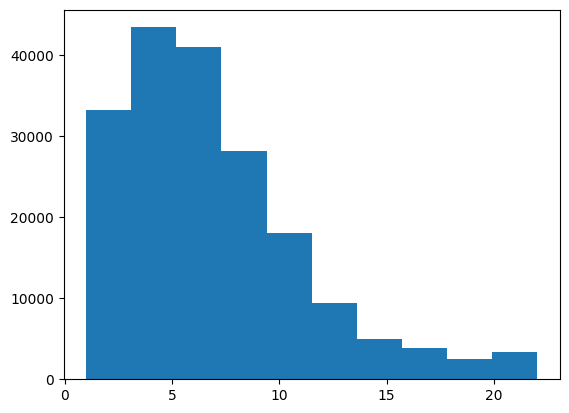

In [63]:
plt.hist(df['experience'])

In [64]:
df['experience'].describe()

count    188126.000000
mean          7.108643
std           4.138710
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          22.000000
Name: experience, dtype: float64

In [65]:
df.shape

(188126, 6)

In [66]:
#Dropping The Duplicate Row's

In [67]:
df.drop_duplicates(inplace=True)
df.shape

(166851, 6)

In [68]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0


In [69]:
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [70]:
df.isna().sum()

company_hash            0
orgyear                 0
ctc                     0
job_position        37267
ctc_updated_year        0
experience              0
dtype: int64

In [71]:
#Filling null values with others

In [72]:
df['job_position'] = df['job_position'].fillna('Others')

In [ ]:
df.isna().sum()

company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
experience          0
dtype: int64

In [73]:
#There Are No Null Values In The Data

In [74]:
df.drop_duplicates(inplace=True)
df.shape

(165721, 6)

In [75]:
df.describe()

,orgyear,ctc,ctc_updated_year,experience
count,165721.000000,1.657210e+05,165721.000000,165721.000000
mean,2014.784526,1.539199e+06,2019.583746,7.215474
std,4.187307,1.836945e+06,1.325783,4.187307
min,2000.000000,3.000000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,4.000000
50%,2016.000000,1.040000e+06,2020.000000,6.000000
75%,2018.000000,1.800000e+06,2021.000000,9.000000
max,2021.000000,1.500000e+07,2021.000000,22.000000


In [76]:
df.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0


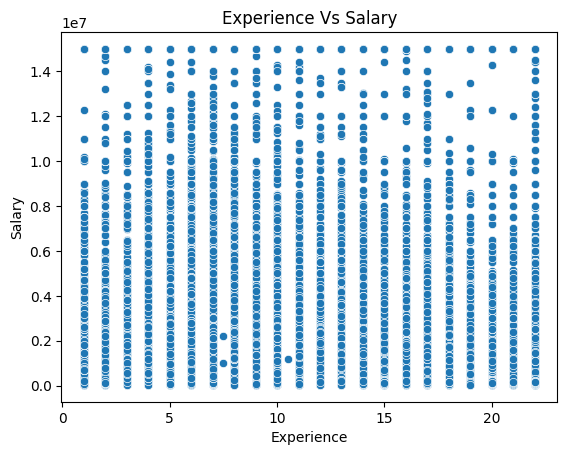

In [77]:
sns.scatterplot(x="experience",y="ctc",data=df)
plt.title("Experience Vs Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
#Clustering Based On Company Job Position & Year's Of Experience

In [78]:
grouped_c_j_y = df.groupby(['experience','job_position','company_hash'])['ctc'].describe()


In [79]:
df_cjy=df.merge(grouped_c_j_y, on=['experience','job_position','company_hash'], how='left')
df_cjy

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.00,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.00,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,448.0,1.365031e+06,1.859983e+06,30000.0,371250.0,894500.0,1624999.75,15000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.00,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.00,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165716,vuurt xzw,2008.0,220000,Others,2019.0,14.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.00,220000.0
165717,husqvawgb,2017.0,500000,Others,2020.0,5.0,4.0,1.202500e+06,4.719022e+05,500000.0,1145000.0,1405000.0,1462500.00,1500000.0
165718,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.00,1000000.0
165719,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,3.0,115.0,1.635720e+06,2.491313e+06,30000.0,390000.0,730000.0,1683500.00,15000000.0


In [80]:
def segment(ctc, fifty_percent, seventy_five_percent):
    if ctc < fifty_percent:
        return 3
    elif ctc >= fifty_percent and ctc <= seventy_five_percent:
        return 2

    elif ctc >= seventy_five_percent:
        return 1

In [81]:
df_cjy['Designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,Designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.00,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.00,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,448.0,1.365031e+06,1.859983e+06,30000.0,371250.0,894500.0,1624999.75,15000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.00,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.00,1400000.0,2


In [82]:
df_cjy.Designation.value_counts(normalize=True)

Designation
2    0.453630
3    0.333193
1    0.213178
Name: proportion, dtype: float64

In [ ]:
#Clustering Based On Company & Job Position

In [83]:
grouped_C_Jp=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_C_Jp.head()

count          mean  \
job_position company_hash                                                     
Others       Others                                    3383.0  1.486714e+06   
             a ntwyzgrgsxto                               6.0  1.229167e+06   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0  5.000000e+05   
             abwavnv ojontb                               1.0  7.000000e+05   
             adw ntwyzgrgsj                              69.0  8.502319e+05   

                                                                std       min  \
job_position company_hash                                                       
Others       Others                                    1.940956e+06   30000.0   
             a ntwyzgrgsxto                            1.401465e+06  350000.0   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN  500000.0   
             abwavnv ojontb                                     NaN  700000.0   
             adw ntwyzgrgsj                            1.036041e+06   80000.0   

                                                            25%       50%  \
job_position company_hash                                                   
Others       Others                                    400000.0  900000.0   
             a ntwyzgrgsxto                            518750.0  587500.0   
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0  500000.0   
             abwavnv ojontb                            700000.0  700000.0   
             adw ntwyzgrgsj                            380000.0  500000.0   

                                                             75%         max  
job_position company_hash                                                     
Others       Others                                    1900000.0  15000000.0  
             a ntwyzgrgsxto                            1162500.0   4000000.0  
             aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna   500000.0    500000.0  
             abwavnv ojontb                             700000.0    700000.0  
             adw ntwyzgrgsj                            1000000.0   8000000.0

In [84]:
df_cj=df.merge(grouped_C_Jp, on=['job_position','company_hash'], how='left')
df_cj.head(20)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,3983.0,1.518600e+06,2.139749e+06,30000.0,360000.0,950000.0,1800000.0,15000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000,fullstack engineer,2020.0,4.0,1.0,7.000000e+05,NaN,700000.0,700000.0,700000.0,700000.0,700000.0
6,lubgqsvz wyvot wg,2018.0,1500000,fullstack engineer,2019.0,4.0,200.0,1.959140e+06,1.558099e+06,30000.0,1370000.0,1700000.0,2200000.0,15000000.0
7,vwwtznhqt ntwyzgrgsj,2019.0,400000,backend engineer,2019.0,3.0,6.0,1.243333e+06,1.147635e+06,400000.0,565000.0,1005000.0,1100000.0,3500000.0
8,utqoxontzn ojontbo,2020.0,450000,Others,2020.0,2.0,120.0,1.060475e+06,7.417553e+05,200000.0,540000.0,880000.0,1300000.0,5500000.0
9,Others,2019.0,360000,Others,2019.0,3.0,3383.0,1.486714e+06,1.940956e+06,30000.0,400000.0,900000.0,1900000.0,15000000.0


In [85]:
df_cj['classs'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,25.0,9.882000e+05,4.874998e+05,300000.0,600000.0,850000.0,1380000.0,2000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,3983.0,1.518600e+06,2.139749e+06,30000.0,360000.0,950000.0,1800000.0,15000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,25.0,1.500000e+06,6.772124e+05,520000.0,1050000.0,1540000.0,1800000.0,3500000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0,1


In [86]:
df_cj.classs.value_counts(normalize=True)

classs
3    0.435135
2    0.320412
1    0.244453
Name: proportion, dtype: float64

In [87]:
# Job position that has the highest class ie Class 1

In [88]:
df_cj[df_cj['classs']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,9237.0,3.146579e+06,2.571010e+06,50000.0,1700000.0,2400000.0,3700000.0,15000000.0
Others,9163.0,2.980927e+06,2.645259e+06,50000.0,1500000.0,2250000.0,3400000.0,15000000.0
fullstack engineer,5188.0,2.800158e+06,2.675664e+06,59000.0,1426000.0,2000000.0,3000000.0,15000000.0
other,3493.0,3.209997e+06,3.758033e+06,72000.0,1200000.0,1880000.0,3000000.0,15000000.0
frontend engineer,2169.0,2.428533e+06,2.589030e+06,90000.0,1300000.0,1700000.0,2400000.0,15000000.0
...,...,...,...,...,...,...,...,...
associate system engineer,1.0,3.500000e+05,NaN,350000.0,350000.0,350000.0,350000.0,350000.0
no job,1.0,3.500000e+05,NaN,350000.0,350000.0,350000.0,350000.0,350000.0
assistant system engineer trainee,1.0,3.400000e+05,NaN,340000.0,340000.0,340000.0,340000.0,340000.0


In [89]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [90]:
df_cj.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1


In [91]:
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,Designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,2


In [92]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','experience','ctc_updated_year'], how='left')
df_cjy_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2
...,...,...,...,...,...,...,...,...
165716,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2
165717,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3
165718,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2
165719,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,3.0,1,1


In [ ]:
#Manual Clustering based on comapny

In [93]:
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,411.0,1.350231e+06,1.661106e+06,30000.0,600000.0,900000.0,1700000.0,15000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,26349.0,1.469624e+06,2.112082e+06,30000.0,420000.0,890000.0,1689999.0,15000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4700000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0


In [ ]:
# Creating Tier basis on the salary in the companies

In [94]:
df_c['Tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,count,mean,std,min,25%,50%,75%,max,Tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,411.0,1.350231e+06,1.661106e+06,30000.0,600000.0,900000.0,1700000.0,15000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,26349.0,1.469624e+06,2.112082e+06,30000.0,420000.0,890000.0,1689999.0,15000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4700000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1


In [95]:
df_c.Tier.value_counts(normalize=True)

Tier
3    0.477115
2    0.282420
1    0.240464
Name: proportion, dtype: float64

In [96]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation,count,mean,std,min,25%,50%,75%,max,Tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,411.0,1.350231e+06,1.661106e+06,30000.0,600000.0,900000.0,1700000.0,15000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,26349.0,1.469624e+06,2.112082e+06,30000.0,420000.0,890000.0,1689999.0,15000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,67.0,1.729478e+06,9.861481e+05,200000.0,1100000.0,1400000.0,2100000.0,4700000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000,fullstack engineer,2020.0,4.0,2,2,6.0,9.066667e+05,5.397283e+05,620000.0,640000.0,700000.0,775000.0,2000000.0,2
6,lubgqsvz wyvot wg,2018.0,1500000,fullstack engineer,2019.0,4.0,3,3,1023.0,2.131823e+06,1.707381e+06,30000.0,1350000.0,1800000.0,2500000.0,15000000.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000,backend engineer,2019.0,3.0,3,3,25.0,7.768000e+05,6.241509e+05,300000.0,430000.0,640000.0,900000.0,3500000.0,3
8,utqoxontzn ojontbo,2020.0,450000,Others,2020.0,2.0,3,3,441.0,1.098093e+06,1.007559e+06,90000.0,590000.0,880000.0,1330000.0,15000000.0,3
9,Others,2019.0,360000,Others,2019.0,3.0,3,3,26349.0,1.469624e+06,2.112082e+06,30000.0,420000.0,890000.0,1689999.0,15000000.0,3


In [97]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,experience,classs,Designation,Tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1


In [98]:
X = df_cjy_cj_c[['ctc', 'experience', 'classs', 'Designation', 'Tier']].copy()

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler()

In [101]:
X_scaled = pd.DataFrame(Scaler.transform(X), columns=X.columns, index=X.index)

In [102]:
X_scaled.head()

,ctc,experience,classs,Designation,Tier
0,-0.239093,-0.290277,-1.484613,-0.164548,-0.290950
1,-0.592943,-0.767912,1.009106,1.206516,0.938498
2,0.250852,-0.051459,-1.484613,-1.535613,-1.520398
3,-0.456846,-0.529094,1.009106,1.206516,0.938498
4,-0.075778,-0.529094,-1.484613,-0.164548,-1.520398


In [104]:
X_scaled.shape

(165721, 5)

In [ ]:
import scipy.cluster.hierarchy as sch

In [105]:
from sklearn.cluster import KMeans

In [133]:
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [134]:
labels = kmeans.labels_

In [135]:
pd.Series(labels).value_counts()

2    42652
7    30891
0    29349
6    20626
3    14336
4    12955
1    12357
5     2555
Name: count, dtype: int64

In [136]:
clusters = pd.DataFrame(X_scaled, columns=X_scaled.columns)
clusters['kmeans_cluster'] = labels

In [137]:
clusters

,ctc,experience,classs,Designation,Tier,kmeans_cluster
0,-0.239093,-0.290277,-1.484613,-0.164548,-0.290950,0
1,-0.592943,-0.767912,1.009106,1.206516,0.938498,2
2,0.250852,-0.051459,-1.484613,-1.535613,-1.520398,6
3,-0.456846,-0.529094,1.009106,1.206516,0.938498,2
4,-0.075778,-0.529094,-1.484613,-0.164548,-1.520398,6
...,...,...,...,...,...,...
165716,-0.718151,1.620265,1.009106,-0.164548,0.938498,1
165717,-0.565723,-0.529094,1.009106,1.206516,0.938498,2
165718,-0.456846,-1.484365,1.009106,-0.164548,0.938498,7
165719,1.938442,-1.006730,-1.484613,-1.535613,-1.520398,6


In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df["labels"]=clusters['kmeans_cluster']

In [ ]:
#Elbow Methood

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

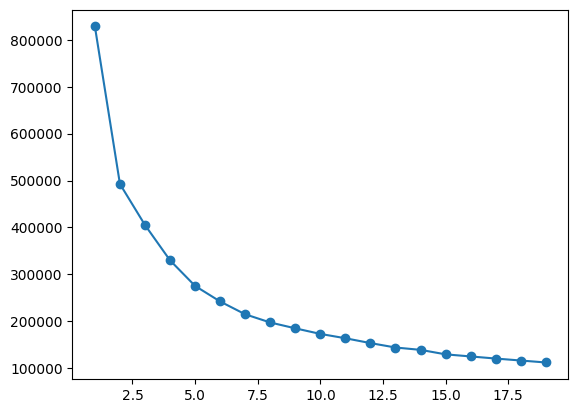

In [132]:
wcss = []
for k in range(1,20):
 m = KMeans(n_clusters=k).fit(X_scaled)
 wcss.append(m.inertia_)
plt.plot(np.arange(1,20), wcss, '-o')

Text(0.5, 1.0, 'Clustered Data Visualization')

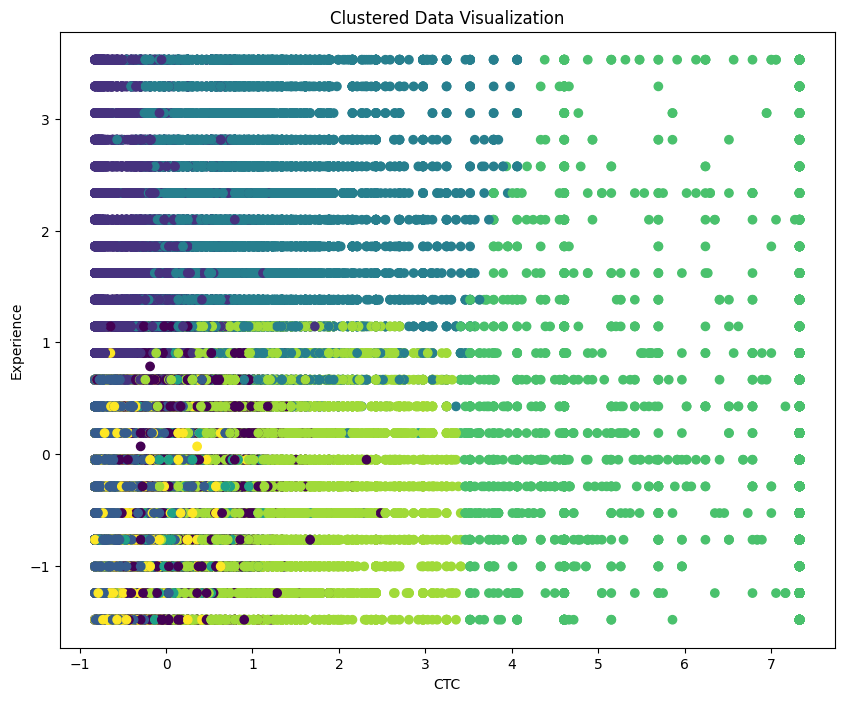

In [139]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(clusters['ctc'], clusters['experience'], c=clusters['kmeans_cluster'], cmap='viridis', marker='o')
plt.xlabel('CTC')
plt.ylabel('Experience')
plt.title('Clustered Data Visualization')

Text(0.5, 1.0, 'Clustered Data Visualization')

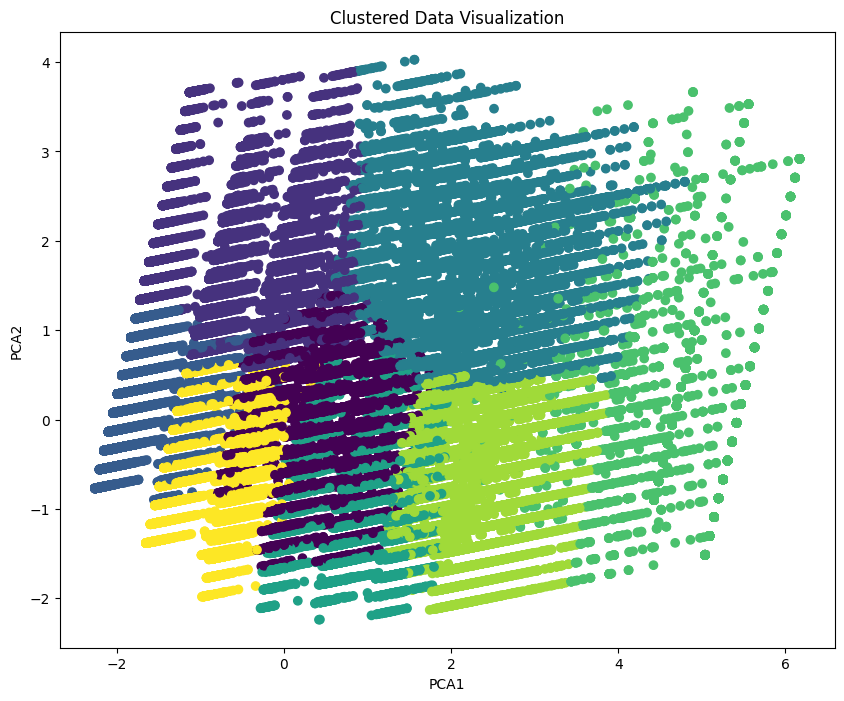

In [140]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['labels'], cmap='viridis', marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustered Data Visualization')

In [ ]:
# AFTER ANALYZING THE DATA
# 1.Top Paying job titles include 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'
# 2. Among top paying companies, salary for these is getting lesser in recent years Avg CTC seems to be decreasing with year.
# 3.By Using Kmeans Clustering We Have Clustered The Data In To 8 Groups
# 4.Using PCA We Reduced The Dimensions To 2 And We Visuvalized The Data